In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.stats.power as ssp

In [2]:
# import warnings
# warnings.filterwarnings('ignore')
# warnings.warn('DelftStack')
# warnings.warn('Do not show this message')

In [3]:
df = pd.read_excel('AB_Test_Results (2).xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [6]:
df.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [7]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [8]:
df.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [9]:
v = df.\
    groupby('USER_ID', as_index=False).\
    agg({'VARIANT_NAME': pd.Series.nunique})

In [10]:
v.head()

,USER_ID,VARIANT_NAME
0,2,1
1,3,2
2,4,1
3,5,1
4,6,1


In [11]:
more_than_one_types = v.query('VARIANT_NAME > 1')

In [12]:
df_new = df[~df.USER_ID.isin(more_than_one_types.USER_ID)].sort_values('USER_ID')

In [13]:
df_new.shape

(6070, 3)

In [14]:
control = df_new.query('VARIANT_NAME == "control"')
test = df_new.query('VARIANT_NAME == "variant"')

In [15]:
stats.shapiro(df.REVENUE)

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.018358170986175537, pvalue=0.0)

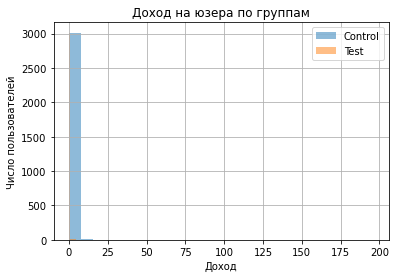

In [16]:
control.REVENUE.hist(bins = 25, alpha =0.5, label='Control')
test.REVENUE.hist(bins = 25, alpha =0.5, label='Test')
plt.title('Доход на юзера по группам')
plt.xlabel('Доход')
plt.ylabel('Число пользователей')
plt.legend();

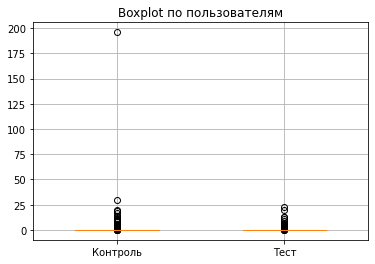

In [17]:
plt.boxplot([control.REVENUE,test.REVENUE],
            labels=['Контроль','Тест'],
            widths=0.5
           )
plt.title('Boxplot по пользователям',  loc='center')
plt.grid(axis  ='both')

In [18]:
stats.mannwhitneyu(x=control.REVENUE.values, y=test.REVENUE.values)

MannwhitneyuResult(statistic=4588312.0, pvalue=0.12220868693246068)

In [19]:
stats.ttest_ind(control.REVENUE.values, test.REVENUE.values, equal_var = False)

Ttest_indResult(statistic=1.403762252371675, pvalue=0.1604844017690842)

In [20]:
C_mean = control.REVENUE.values.mean()

T_mean = test.REVENUE.values.mean()


C_std = control.REVENUE.values.std()

T_std = test.REVENUE.values.std()

n =  len(control.REVENUE.values)

In [21]:
S = np.sqrt((T_std**2 + C_std **2)/ 2)

In [22]:
ef =float((T_mean-C_mean)/ S) 

In [23]:
alpha = 0.05

analysis = ssp.TTestIndPower()
result = analysis.solve_power(ef, power=None,
nobs1=n, ratio=1.0, alpha=alpha)

result

0.28936707257546307

Какие выводы можно сделать? Во первых у нас есть однозначно баги в самом тесте, так как одни и теже пользователи попадают в оба варианта, во вторых очень слабая мощность теста, что скорее всего говорит о маленьком объеме выборки, возмож